In [60]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Méthode de la bissection #

In [25]:
def bisection_method(a, b, f, tol=1e-5, max_iter=1000):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) et f(b) doivent avoir des signes opposés")

    for i in range(max_iter):
        m = (a + b) / 2
        if abs(f(m)) < tol or (b - a) / 2 < tol:
            return m
        if f(m) * f(a) < 0:
            b = m
        else:
            a = m

    raise RuntimeError("Nombre d'itérations maximum atteint sans convergence")

    

# Méthode de Brent #

In [46]:
def methode_brent(f, intervalle, tolerance):
    x = np.array(intervalle)
    y = np.array([f(x[0]), f(x[1])])

    if np.sum(np.sign(y)) != 0:
        raise Exception("Les valeurs aux bornes choisies ne sont pas de signes opposés")
    
    # Échange a et b, car b doit représenté la meilleur approximation de la racine
    if abs(y[0]) < abs(y[1]):
        x = x[::-1]
        y = y[::-1]

    # Définition variables
    a = x[0]
    b = c = x[1]
    fa = y[0]
    fb = fc = y[1]
    d = 0
    # Paramètre déterminant si la méthode de dichotomie ou d'interpolation a été retenue précédemment
    dicho = True

    while abs(fb) > tolerance and np.abs(b-a)> tolerance:
        # Calcul de s avec interpolation quadratique inverse ou avec méthode des sécantes
        if fa != fb and fa != fc and fb != fc:
            s = (a*fb*fc)/((fa-fb)*(fa-fc)) + (b*fa*fc)/((fb-fa)*(fb-fc)) + (c*fa*fb)/((fc-fa)*(fc-fb)) 
        else:
            s = b - fb * ((b-a)/(fb-fa))
         
        # Conditions pour utilisé le point milieu calculé avec la méthode de dichotomie plutôt que s calculé avec l'interpolation
        # Certaines conditions dépendent de la méthode utilisée à l'itération précedente soit le paramètre dicho
        cond1 = (s - (3*a + b)/4)*(s - b) >= 0
        cond2 = dicho and abs(s - b) >= 0.5*abs(b - c)
        cond3 = not dicho and abs(s - b) >= 0.5*abs(c - d)
        
        if cond1 or cond2 or cond3:
            s = (a + b)/2
            dicho = True
        else:
            dicho = False

        # Modification variable pour prochaine itération
        d = c
        c = b
        fc = fb
        
        # Choix du nouveau contrepoint afin que f(a+1) et f(b+1) soient de signes opposés
        fs = f(s)
        if fa*fs < 0:
            b = s
            fb = fs
        else:
            a = s
            fa = fs
        
        # S'assure que b est la meilleur approximation de la racine
        if abs(fa) < abs(fb):
            a, b = b, a
            fa, fb = fb, fa

    return b

In [57]:
def f(x):
    return x**3 - x - 2

# Test de la méthode sur [1, 2] avec une tolérance de 1e-8
racine_approx = methode_brent(f, (1, 2), 1e-8)
a = bisection_method(1.4, 1.6, f, tol=1e-8)
print(racine_approx)
print(a)

1.521379706804822
1.5213797032833103


[-2.15 -1.42 -1.29 -0.2   0.1   0.14  0.82  1.1   1.5   2.85  3.8 ]
[1.23350e-02 1.22439e-01 1.83396e-01 9.62973e-01 9.92804e-01 9.77224e-01
 5.23455e-01 2.93345e-01 1.05332e-01 3.94000e-04 1.40000e-06]


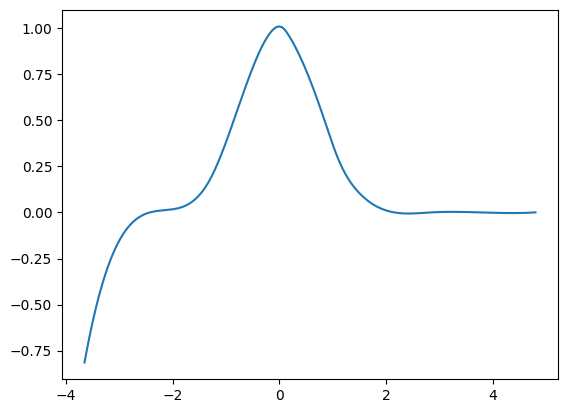

In [74]:
x = np.array([-2.15, -1.42, -1.29, -0.2, 0.1, 0.14, 0.82, 1.1, 1.5, 2.85, 3.8])
y = np.array([0.012335, 0.122439, 0.183396, 0.962973, 0.992804, 0.977224, 0.523455, 0.293345, 0.105332, 0.000394, 0.0000014])

x_interp = np.linspace(np.min(x)-1.5, np.max(x)+1, 200)
# Spline naturelle: bc_type="natural"
print(x)
print(y)
cubic_spline = CubicSpline(x, y, bc_type="natural")
print(cubic_spline)
plt.plot(x_interp, cubic_spline(x_interp))
plt.show()